# Code alongs API

Go into [Alpha Vantage](https://www.alphavantage.co/documentation/) and read the documentation of the time series APIs

- Go into [claim API key](https://www.alphavantage.co/support/#api-key) and fill in the form to claim your free API-key

in your .env

type: 

```
ALPHA_API_KEY=...
```

In [1]:
from dotenv import load_dotenv
import requests
import pandas as pd 
import os 

load_dotenv()

api_key = os.getenv("ALPHA_API_KEY")




In [2]:
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={api_key}'
response = requests.get(url)
data = response.json()

data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [3]:
data["Meta Data"]

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2024-03-21',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [4]:
data["Time Series (Daily)"]

{'2024-03-21': {'1. open': '193.0000',
  '2. high': '193.3700',
  '3. low': '190.0100',
  '4. close': '191.9000',
  '5. volume': '6013561'},
 '2024-03-20': {'1. open': '192.8700',
  '2. high': '193.9800',
  '3. low': '191.3100',
  '4. close': '193.9600',
  '5. volume': '3238643'},
 '2024-03-19': {'1. open': '191.4900',
  '2. high': '193.5800',
  '3. low': '190.2800',
  '4. close': '193.3400',
  '5. volume': '5317341'},
 '2024-03-18': {'1. open': '191.7000',
  '2. high': '193.2300',
  '3. low': '190.3200',
  '4. close': '191.6900',
  '5. volume': '5410562'},
 '2024-03-15': {'1. open': '191.9900',
  '2. high': '193.0573',
  '3. low': '190.7000',
  '4. close': '191.0700',
  '5. volume': '8828184'},
 '2024-03-14': {'1. open': '196.9500',
  '2. high': '197.7480',
  '3. low': '192.1200',
  '4. close': '193.4300',
  '5. volume': '4102202'},
 '2024-03-13': {'1. open': '197.5500',
  '2. high': '198.1000',
  '3. low': '195.3200',
  '4. close': '196.7000',
  '5. volume': '3960737'},
 '2024-03-12'

In [5]:
data["Time Series (Daily)"]["2024-03-18"]

{'1. open': '191.7000',
 '2. high': '193.2300',
 '3. low': '190.3200',
 '4. close': '191.6900',
 '5. volume': '5410562'}

In [6]:
data["Time Series (Daily)"]["2024-03-18"]["5. volume"]

'5410562'

In [7]:
pd.DataFrame(data["Time Series (Daily)"])

,2024-03-21,2024-03-20,2024-03-19,2024-03-18,2024-03-15,2024-03-14,2024-03-13,2024-03-12,2024-03-11,2024-03-08,...,2023-11-09,2023-11-08,2023-11-07,2023-11-06,2023-11-03,2023-11-02,2023-11-01,2023-10-31,2023-10-30,2023-10-27
1. open,193.0000,192.8700,191.4900,191.7000,191.9900,196.9500,197.5500,192.4600,195.0900,196.0600,...,146.5500,149.2500,149.0300,147.8900,147.4500,145.7700,145.0000,143.0000,143.1900,143.6200
2. high,193.3700,193.9800,193.5800,193.2300,193.0573,197.7480,198.1000,199.1800,195.3800,197.7700,...,146.9900,149.6800,149.2800,149.2250,148.4450,147.1000,146.5100,144.7600,144.5000,144.7000
3. low,190.0100,191.3100,190.2800,190.3200,190.7000,192.1200,195.3200,192.1500,190.8800,194.3800,...,145.2800,147.5850,148.0300,147.8500,147.2800,144.8400,144.4500,142.5900,142.5800,141.7100
4. close,191.9000,193.9600,193.3400,191.6900,191.0700,193.4300,196.7000,197.7800,191.7300,195.9500,...,146.6200,148.0300,148.8300,148.9700,147.9000,147.0100,145.4000,144.6400,142.6300,142.5200
5. volume,6013561,3238643,5317341,5410562,8828184,4102202,3960737,5862512,4712688,3943113,...,3412713,3618588,3549853,4597249,3510495,3902657,4750081,6592041,4204190,5469227


In [8]:
pd.DataFrame(data["Time Series (Daily)"]).transpose()

,1. open,2. high,3. low,4. close,5. volume
2024-03-21,193.0000,193.3700,190.0100,191.9000,6013561
2024-03-20,192.8700,193.9800,191.3100,193.9600,3238643
2024-03-19,191.4900,193.5800,190.2800,193.3400,5317341
2024-03-18,191.7000,193.2300,190.3200,191.6900,5410562
2024-03-15,191.9900,193.0573,190.7000,191.0700,8828184
...,...,...,...,...,...
2023-11-02,145.7700,147.1000,144.8400,147.0100,3902657
2023-11-01,145.0000,146.5100,144.4500,145.4000,4750081
2023-10-31,143.0000,144.7600,142.5900,144.6400,6592041
2023-10-30,143.1900,144.5000,142.5800,142.6300,4204190


## Iterate over several stocks

In [9]:
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols: 
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    series = df["4. close"].rename(symbol).astype(float)
    stock_list.append(series)

In [10]:
stock_list[0]

2024-03-21    171.37
2024-03-20    178.67
2024-03-19    176.08
2024-03-18    173.72
2024-03-15    172.62
               ...  
2023-11-02    177.57
2023-11-01    173.97
2023-10-31    170.77
2023-10-30    170.29
2023-10-27    168.22
Name: AAPL, Length: 100, dtype: float64

In [11]:
len(stock_list)

4

In [12]:
stocks = pd.concat(stock_list, axis=1)
stocks

,AAPL,NVDA,TSLA,IBM
2024-03-21,171.37,914.350,172.82,191.90
2024-03-20,178.67,903.720,175.66,193.96
2024-03-19,176.08,893.980,171.32,193.34
2024-03-18,173.72,884.550,173.80,191.69
2024-03-15,172.62,878.365,163.57,191.07
...,...,...,...,...
2023-11-02,177.57,435.060,218.51,147.01
2023-11-01,173.97,423.250,205.66,145.40
2023-10-31,170.77,407.800,200.84,144.64
2023-10-30,170.29,411.610,197.36,142.63


In [13]:
import plotly_express as px 

px.line(stocks, x=stocks.index, y=stocks.columns)

## Working with time series 

In [14]:
print(stocks.index.dtype)
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()

object
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2024-03-21,171.37,914.350,172.82,191.90
2024-03-20,178.67,903.720,175.66,193.96
2024-03-19,176.08,893.980,171.32,193.34
2024-03-18,173.72,884.550,173.80,191.69
2024-03-15,172.62,878.365,163.57,191.07


In [15]:
stocks.loc["2023-11"]

,AAPL,NVDA,TSLA,IBM
2023-11-30,189.95,467.70,240.08,158.56
2023-11-29,189.37,481.40,244.14,156.41
2023-11-28,190.40,478.21,246.72,155.65
2023-11-27,189.79,482.42,236.08,155.57
2023-11-24,189.97,477.76,235.45,155.18
2023-11-22,191.31,487.16,234.21,155.13
2023-11-21,190.64,499.44,241.20,153.91
2023-11-20,191.45,504.09,235.60,154.35
2023-11-17,189.69,492.98,234.30,152.89
2023-11-16,189.71,494.80,233.59,153.06


In [16]:
stocks.sort_index().loc["2024-02-15":"2024-03"]

,AAPL,NVDA,TSLA,IBM
2024-02-15,183.86,726.580,200.45,186.87
2024-02-16,182.31,726.130,199.95,187.64
2024-02-20,181.56,694.520,193.76,183.44
2024-02-21,182.32,674.720,194.77,179.70
2024-02-22,184.37,785.380,197.41,184.21
2024-02-23,182.52,788.170,191.97,185.72
2024-02-26,181.16,790.920,199.40,184.13
2024-02-27,182.63,787.010,199.73,184.87
2024-02-28,181.42,776.630,202.04,185.30
2024-02-29,180.75,791.120,201.88,185.03


## Plot 4 stocks in subplots

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

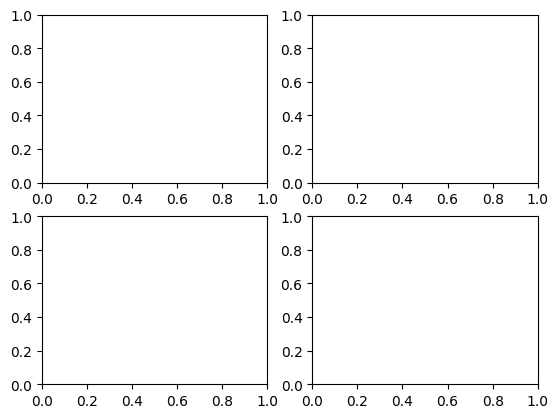

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(2,2)
axes


In [18]:
axes.shape

(2, 2)

In [19]:
axes.flatten(), axes.flatten().shape

(array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object), (4,))

Text(0.5, 1.03, 'Stocks in 2024')

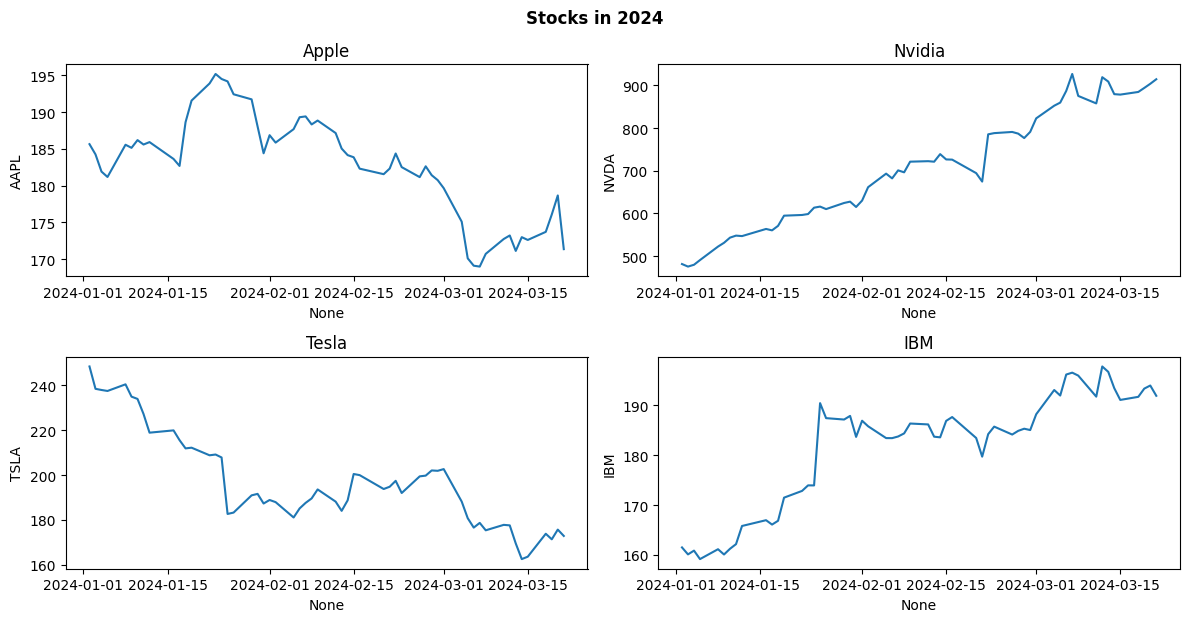

In [20]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia", "TSLA": "Tesla", "IBM": "IBM"}

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks.loc["2024"], x=stocks.loc["2024"].index, y=symbol, ax=ax)
    ax.set(title=f"{stock_names[symbol]}")

fig.tight_layout()
fig.suptitle("Stocks in 2024", y=1.03, fontweight="bold")